In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
import joblib

In [2]:
file_path = r"C:\SHIV\Major Project\Churn Analysis\Data\Prediction_Churn.xlsx"

sheet_name = 'vw_ChurnData'

data = pd.read_excel(file_path, sheet_name=sheet_name)

print(data.head())

  Customer_ID  Gender  Age Married           State  Number_of_Referrals  \
0   11098-MAD  Female   30     Yes  Madhya Pradesh                    0   
1   11114-PUN    Male   51      No          Punjab                    5   
2   11167-WES  Female   43     Yes     West Bengal                    3   
3   11179-MAH    Male   35      No     Maharashtra                   10   
4   11180-TAM    Male   75     Yes      Tamil Nadu                   12   

   Tenure_in_Months Value_Deal Phone_Service Internet_Type  ...  \
0                31     Deal 1           Yes   Fiber Optic  ...   
1                 9     Deal 5           Yes           DSL  ...   
2                28     Deal 1           Yes   Fiber Optic  ...   
3                12        NaN           Yes           DSL  ...   
4                27     Deal 2           Yes           DSL  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0  Bank Withdrawal      95.099998   6683.399902          0.00   
1  Bank Withdraw

In [3]:
data = data.drop(columns=['Customer_ID', 'Churn_Category', 'Churn_Reason'], errors='ignore')

columns_to_encode = [
    'Gender', 'Married', 'State', 'Value_Deal', 'Phone_Service', 'Multiple_Lines',
    'Internet_Service', 'Internet_Type', 'Online_Security', 'Online_Backup',
    'Device_Protection_Plan', 'Premium_Support', 'Streaming_TV', 'Streaming_Movies',
    'Streaming_Music', 'Unlimited_Data', 'Contract', 'Paperless_Billing',
    'Payment_Method'
]

label_encoders = {}
for column in columns_to_encode:
    if column in data.columns:
        label_encoders[column] = LabelEncoder()
        data[column] = label_encoders[column].fit_transform(data[column])

data['Customer_Status'] = data['Customer_Status'].map({'Stayed': 0, 'Churned': 1})

X = data.drop('Customer_Status', axis=1)
y = data['Customer_Status']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (4805, 25)
Test shape: (1202, 25)


In [4]:
rf_model = RandomForestClassifier(n_estimators=100,random_state=42)

rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Confusion Matrix: 
[[779  68]
 [126 229]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       847
           1       0.77      0.65      0.70       355

    accuracy                           0.84      1202
   macro avg       0.82      0.78      0.80      1202
weighted avg       0.83      0.84      0.83      1202



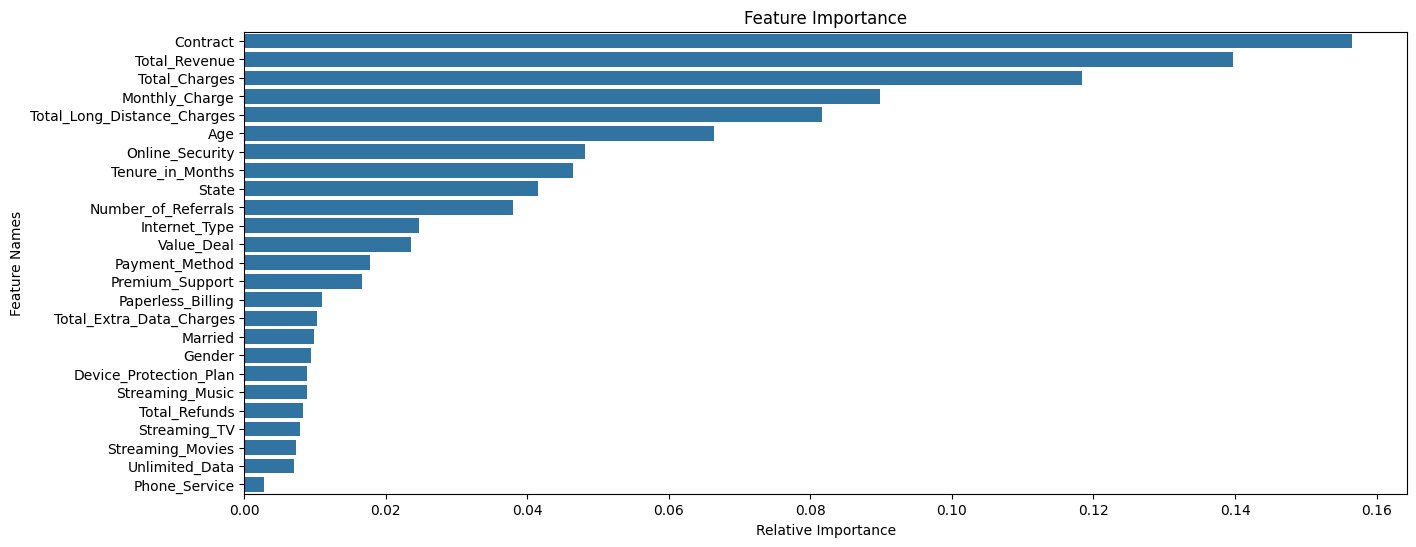

In [5]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix: ")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15,6))
sns.barplot(x=importances[indices], y = X.columns[indices])
plt.title("Feature Importance")
plt.xlabel("Relative Importance")
plt.ylabel("Feature Names")
plt.show()

In [6]:
file_path = r"C:\SHIV\Major Project\Churn Analysis\Data\Prediction_Churn.xlsx"

sheet_name = 'VW_JoinData'

new_data = pd.read_excel(file_path, sheet_name=sheet_name)

print(new_data.head())

original_data = new_data.copy()

customer_ids = new_data['Customer_ID']

new_data = new_data.drop(['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason'], axis=1)

for column in new_data.select_dtypes(include=['object']).columns:
    new_data[column] = label_encoders[column].transform(new_data[column])

new_predictions = rf_model.predict(new_data)

original_data['Customer_Status_Predicted'] = new_predictions

original_data = original_data[original_data['Customer_Status_Predicted'] == 1]

original_data.to_csv(r"C:\SHIV\Major Project\Churn Analysis\Data\Predictions.csv", index=False)

  Customer_ID  Gender  Age Married        State  Number_of_Referrals  \
0   11751-TAM  Female   18      No   Tamil Nadu                    5   
1   12056-WES    Male   27      No  West Bengal                    2   
2   12136-RAJ  Female   25     Yes    Rajasthan                    2   
3   12257-ASS  Female   39      No        Assam                    9   
4   12340-DEL  Female   51     Yes        Delhi                    0   

   Tenure_in_Months Value_Deal Phone_Service Internet_Type  ...  \
0                 7     Deal 5            No           DSL  ...   
1                20        NaN           Yes   Fiber Optic  ...   
2                35        NaN           Yes           NaN  ...   
3                 1        NaN           Yes           NaN  ...   
4                10        NaN           Yes         Cable  ...   

    Payment_Method Monthly_Charge Total_Charges Total_Refunds  \
0     Mailed Check      24.299999     38.450001           0.0   
1  Bank Withdrawal      90.400002 